### Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.
### Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [49]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")



In [50]:
#reading json datafile
logins = pd.read_json('./logins.json') 


In [51]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [52]:
logins['count'] = 1
logins = logins.set_index('login_time')
logins[:5]

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [53]:
#Aggregate login counts based on 15 minute time intervals, pandas.Grouper will come handy

logins = logins.groupby(pd.Grouper(freq = '15Min')).aggregate(np.sum)

logins.reset_index(inplace = True)

logins.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [54]:
#Checking for missing values
logins.isnull().any() 

login_time    False
count         False
dtype: bool

In [37]:
logins.index = pd.to_datetime(logins.index)

In [33]:
logins.reset_index(drop = True, inplace = True)

In [55]:
# Creating new columns for EDA
logins['month'] = logins.login_time.apply(lambda x: x.strftime("%B"))
logins['day'] = logins.login_time.apply(lambda x: x.strftime("%A"))
logins['hour'] = logins.login_time.apply(lambda x: x.strftime("%H"))
logins['time-15mins'] = logins.login_time.apply(lambda x: x.strftime("%H:%M"))

In [56]:
logins.head()

,login_time,count,month,day,hour,time-15mins
0,1970-01-01 20:00:00,2,January,Thursday,20,20:00
1,1970-01-01 20:15:00,6,January,Thursday,20,20:15
2,1970-01-01 20:30:00,9,January,Thursday,20,20:30
3,1970-01-01 20:45:00,7,January,Thursday,20,20:45
4,1970-01-01 21:00:00,1,January,Thursday,21,21:00


## Part 1 -  Exploratory Data Analysis

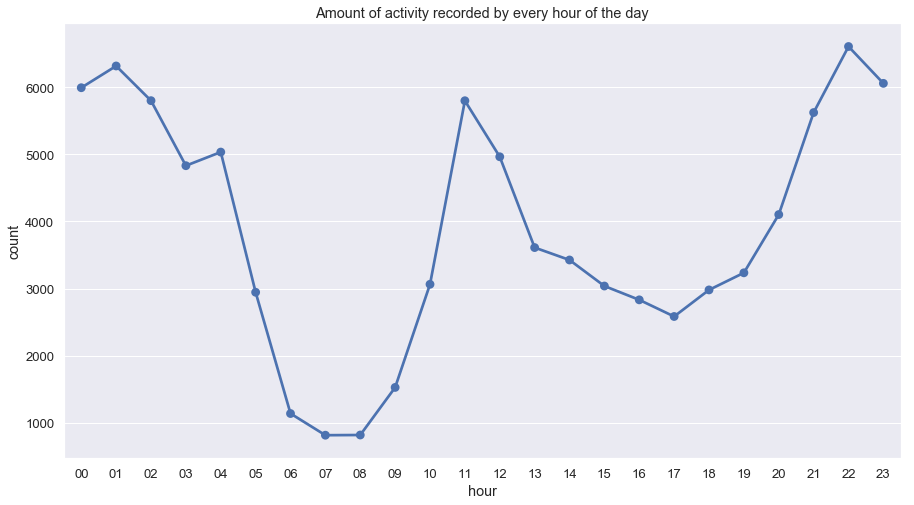

In [57]:
hr_count = logins.groupby('hour')['count'].sum()
sns.set(font_scale = 1.2) 
plt.figure(figsize=(15,8))
plt.title('Amount of activity recorded by every hour of the day')
sns.pointplot(x = hr_count.index, y = hr_count)
plt.show()

The graph above show the amount of activity recorded by each hour of the day. <br>
        -  The platform records maximum activity between 10pm - 1am
        -  The least activity is recorded between 6am and 8am
        -  There is sharph rise in activity between 9am and 11am, And 8pm and 10pm

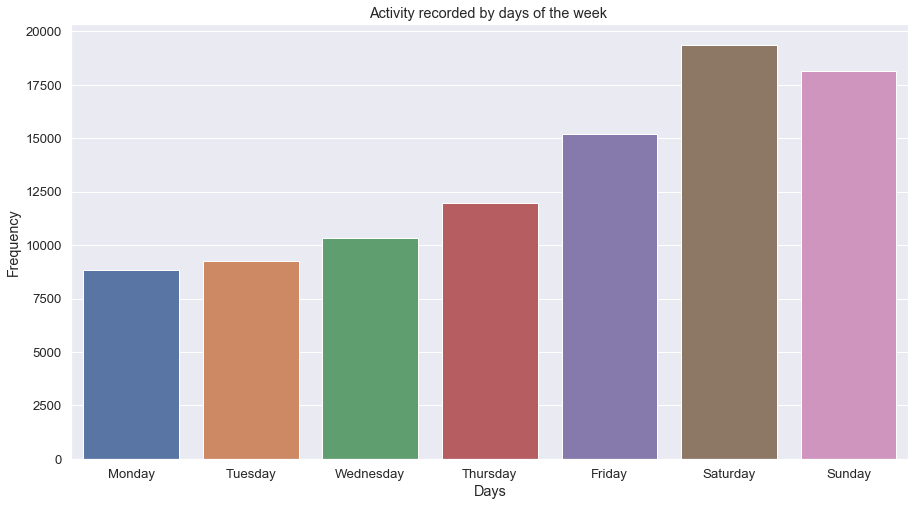

In [58]:
day_counts = logins.groupby('day')['count'].sum()

plt.figure(figsize=(15,8))
sns.barplot(x=day_counts.index, y=day_counts, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Activity recorded by days of the week ')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


The Bargraph above shows the activity by each day of the week <br>
    -  Saturday has been observed as the most popular day for the users followed by Sunday and Friday
    -  Users are more active on the weekend than on any other day of the week

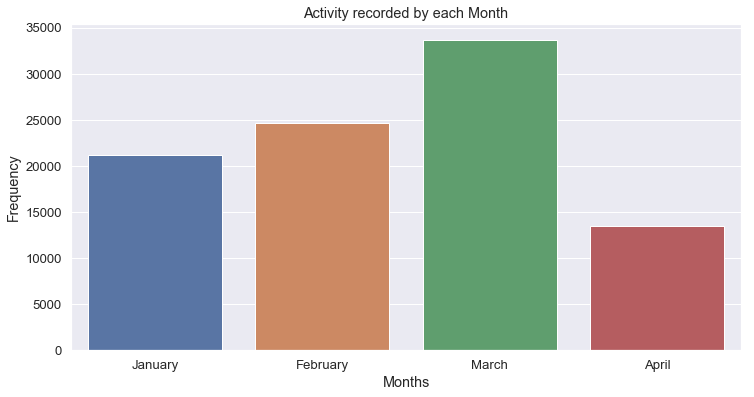

In [59]:
month_counts = logins.groupby('month')['count'].sum()
sns.set(font_scale = 1.2) 
plt.figure(figsize=(12,6))
sns.barplot(x = month_counts.index, y = month_counts, order = ['January', 'February', 'March', 'April'])
plt.title('Activity recorded by each Month')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()


Bar graph above shows number of activity by each month, As shown the numbers have dramatically increased over the months, Month of April has only 13 days of data recorded. Trend shows increasing user base.

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

            
__Gotham__ : Weekdays, Most active at night <br>
__Metropolis__ : Weekdays, Most active during the day <br>


__Success Metric__: Success metrics I purpose is ratio of % of trips taken by Gotham drivers in Metropolis and % of trips taken by Metropolis drivers in Gotham. If the ratio has regressed towards 1:1, it would mean that the experiment was successful.

__Practical Experiment__ : 
        -  Label drivers, exp. A: Drivers who belong to Gotham and B: Drivers who belong to Metropolis
        -  Divide the passangers in two drop control and variants
        -  Run A/B testing using difference of propotions
        -  If the Null Hypothesis holds, it implies that the experiment has been a failure and If the Alternate hypothesis holds, it implies that the test has been a success

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).
Data description
    -   city: city this user signed up in
    -   phone: primary device for this user
    -   signup_date: date of account registration; in the form ‘YYYY MM DD’
    -   last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    -   avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    -   avg_rating_by_driver: the rider’s average rating over all of their trips
    -   avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    -   surge_pct: the percent of trips taken with surge multiplier > 1
    -   avg_surge: The average surge multiplier over all of this user’s trips
    -   trips_in_first_30_days: the number of trips this user took in the first 30 days after
         signing up
    -   ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
         FALSE otherwise
    -   weekday_pct: the percent of the user’s trips occurring during a weekday

In [60]:
# Reading json file
data = open('ultimate_data_challenge.json', 'r').readline()
data = json.loads(data)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [62]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [63]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


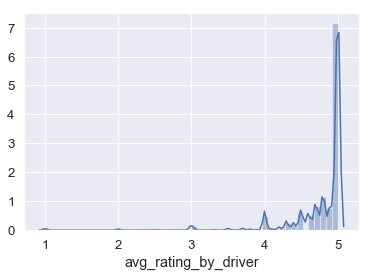

In [64]:
sns.distplot(df[df['avg_rating_by_driver'].notnull()]['avg_rating_by_driver']);


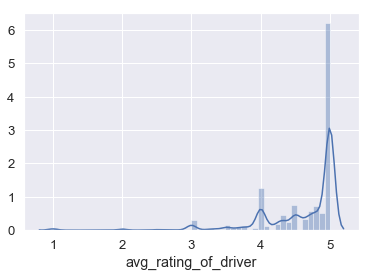

In [65]:
sns.distplot(df[df['avg_rating_of_driver'].notnull()]['avg_rating_of_driver']);


Will fill missing values in rating_by_driver and rating_of_driver columns with respective median values.

In [66]:
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.median(), inplace = True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.median(), inplace = True)


In [67]:
df.avg_rating_of_driver.describe()

count    50000.000000
mean         4.650038
std          0.575601
min          1.000000
25%          4.500000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [68]:
df.phone.value_counts(dropna = False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

As phone column is categorical, will fill missing values with Others

In [69]:
df.phone.fillna('other', inplace = True)

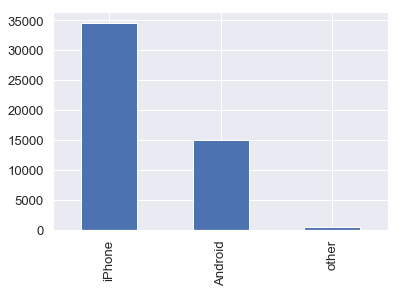

In [70]:
df.phone.value_counts().plot(kind = 'bar');

In [71]:
df.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0


In [72]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system <br>

We will create new column ['retained'], A user will be considered retained if he/she has taken trip after June 1st 2014.

In [73]:
df['retained'] = df['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz = None) else 0)

In [74]:
df.retained.value_counts()/len(df)

0    0.62392
1    0.37608
Name: retained, dtype: float64

Ultimate Inc. has been able to retain about 37.6% of Users.

In [75]:
df.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0


In [76]:
df['ultimate_black_user'] = df['ultimate_black_user'].apply(lambda x: 1 if x else 0)

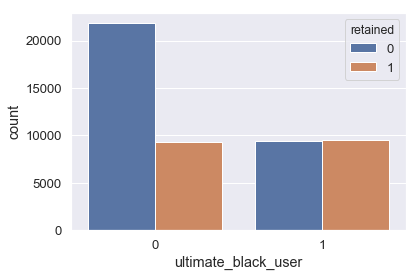

In [77]:
sns.countplot(x = 'ultimate_black_user', data = df, hue = 'retained');

Ultimate Black Users are more likely to be retained, compared to other users

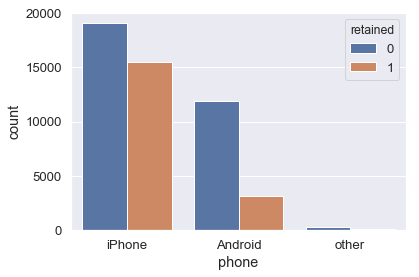

In [78]:
sns.countplot(x = 'phone', data = df, hue = 'retained');

Iphone users are more likely to me retained, compared to Android and other users.

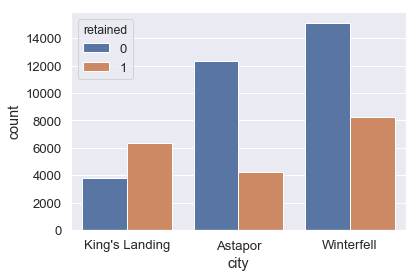

In [81]:
sns.countplot(x = 'city', data = df, hue = 'retained');

Users from __king's Landing__ are more likely to be reatained, Where as __Astopher__ is the least successful at retaining users.

In [82]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


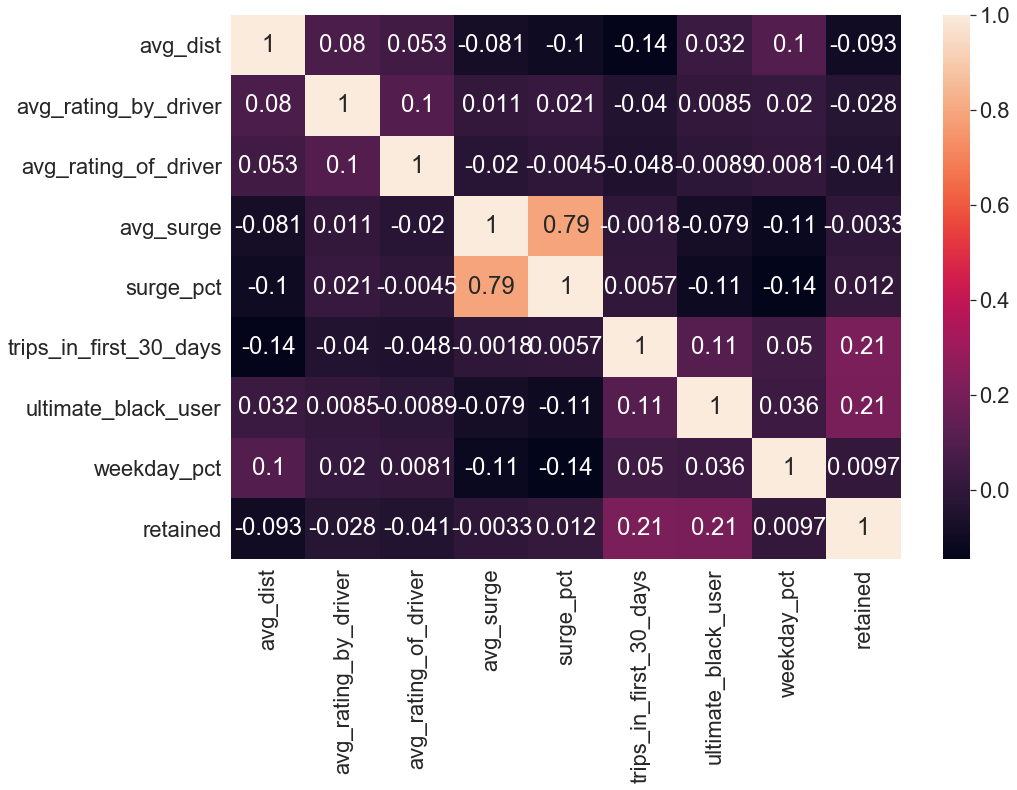

In [88]:
plt.figure(figsize=(15,10))
sns.set(font_scale =2 ) 
sns.heatmap(df.corr(), annot = True);

In [94]:
df = pd.get_dummies(df, prefix='is', drop_first = True)

In [95]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,is_Astapor,is_King's Landing,is_Winterfell,is_Android,is_iPhone,is_other
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,1,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,0,1,0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,1,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,0,1,1,0,0


In [96]:
df.shape

(50000, 17)

In [113]:
X, y = df.drop(['retained','last_trip_date', 'signup_date'  ], axis=1), df['retained']

In [114]:
print(X.shape)
print(y.shape)

(50000, 14)
(50000,)


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc

In [116]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.80, test_size=0.20, stratify=y)

In [117]:
model = rfc(verbose=True, n_estimators=200)
model.fit(train_X, train_y)
model.score(test_X, test_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


0.7592

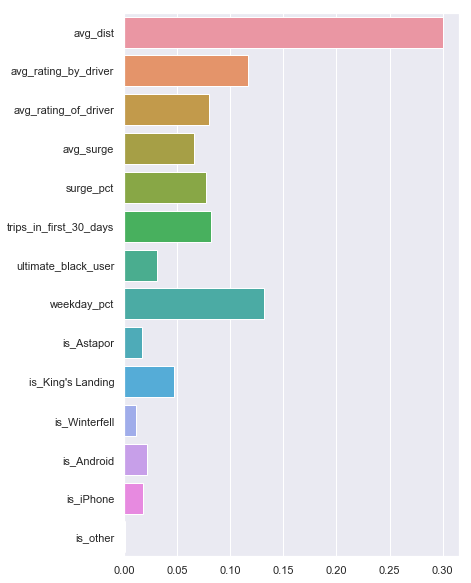

In [122]:
plt.figure(figsize=(6,10))
sns.set(font_scale =1)
sns.barplot(y = X.columns, x = model.feature_importances_);

Recommendations: <br>
    - Operationgs should be increased in Kings Landing, as number of users retained is the highest in Kinds Landing than anyother City.A Study should be conducted in King Landing to better understand of their operations, so similar can be applied in other cities to improve their retained rate.

    - Ultimate Black Users are more likely to stay.
    
    - Features such as: avg_dist, avg_rating_by_driver and weekday_pct are the most important features as discovered by our Random Forest Classifier. People who uses services on weekdays are more likely to be retainted, we should encourage new users to use service on weekday for work or everyday errands.
    
    - Avg_rating_by_driver and Avg_rating_of_driver are strong predictors as well followed by weekday_pct. Which simply indicates, First Impression of the service is important. We should match new users with high rated drivers.
